Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/08_Clustering'
except ImportError as e:
    pass

## Machine Learning in scikit-learn

Estimators usually provide the two functions ```fit()``` and ```predict()```, as well as their combination ```fit_predict()```.

### Learning and predicting (supervised)

- An **estimator** for classification is a Python object that implements the methods:
    - ```fit(X, target)```: learns the model based on training data where the value of the target variable is known
    - ```predict(T)```: applies the learned model to unseen data
    
### Clustering (unsupervised)
- one important function:
    - ```fit_predict(X)```: fits the model and returns the discovered clusters


We will use the customer dataset of the first exercise task for this introduction:

In [2]:
# import pandas
import pandas as pd

# load the dataset into a dataframe
customer_data = pd.read_excel('CustomerDataSet.xls')

# show the first few rows of the dataset
customer_data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


### Recap: Cluster Analysis
- Find groups of objects that are similar to each other and different from others
- Goal: Understand the data
    - Exploration of the data
    - The “correct” cluster assigned is not known -> unsupervised learning
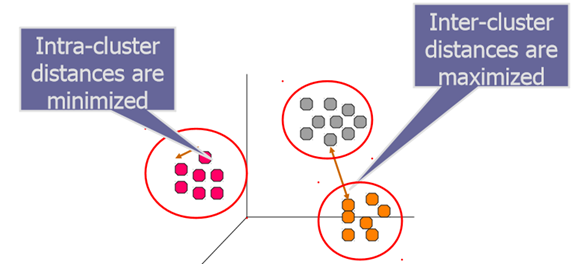

####  KMeans clustering:
- Partitional clustering approach
- Each example is assigned to its closest centroid
    - Requires a distance function!
- Number of clusters (k) must be specified manually
- Iteratively move the centroids to the centre of the clusters
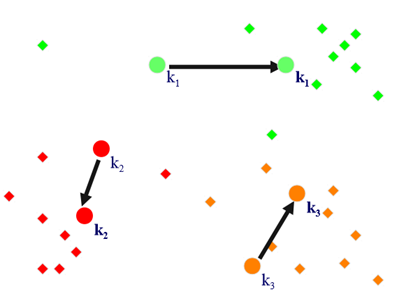

####  KMeans clustering:
- import [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from the sklearn.cluster package
- create an instance of the estimator using the KMeans() constructor
    - important parameters: ```n_clusters``` (the number of clusters)
    - this implementation always uses Euclidean distance!
- call the [```fit_predict()``` function](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit_predict) to compute the clusters and return the cluster index for each example.
- call the [```fit``` function](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit) to compute the clusters. You can access the cluster indices for the examples using ```.labels_```

In [3]:
# import KMeans
from sklearn.cluster import KMeans

# create the estimator and set k to 3
estimator = KMeans(n_clusters = 3)

# fit the model and return the clusters
labels = estimator.fit_predict(customer_data[['ItemsBought', 'ItemsReturned']])

# print the cluster ids of each example
print(labels)

# OR

# fit the model
estimator.fit(customer_data[['ItemsBought', 'ItemsReturned']])

# access the clusters and print them
print(estimator.labels_)

# QUESTION: why is the output of the two variants not always the same?
# ANSWER: the clusters are the same, just the cluster ids change because of their random initialisation!

[0 2 0 1 1 2 2 0 1 0 0 0 2]
[2 1 2 0 0 1 1 2 0 2 2 2 1]


#### Plotting clusters:
For plotting the clusters you can use the ```c``` parameter of the [plotting function ```scatter```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

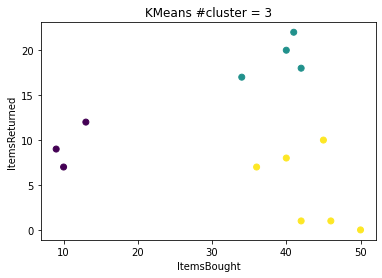

In [4]:
# import matplotlib
import matplotlib.pyplot as plt

# set the title of the plot
plt.title("KMeans #cluster = 3")

# set the axis labels
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')

# create a scatter plot with ItemsBought on the x-axis, ItemsReturned on the y-axis, and the cluster id as colour
plt.scatter(customer_data['ItemsBought'], customer_data['ItemsReturned'], c=estimator.labels_)

# show the plot
plt.show()

## Preprocessing

In [5]:
from sklearn import preprocessing

display(customer_data.head())

scaler = preprocessing.MinMaxScaler()
ordinal_encoder = preprocessing.OrdinalEncoder()

customer_data[['Product', 'ZipCode']] = ordinal_encoder.fit_transform(customer_data[['Product', 'ZipCode']])
customer_data[['ItemsBought', 'ItemsReturned']] = scaler.fit_transform(customer_data[['ItemsBought', 'ItemsReturned']])

display(customer_data.head())

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,1.0,3.0
1,5,0.804878,0.818182,4.0,8.0
2,6,1.000000,0.000000,0.0,2.0
3,8,0.097561,0.545455,3.0,6.0
4,9,0.024390,0.318182,2.0,6.0



### How can I add the cluster id to the dataframe?

The [```assign```](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html) function allows you to add new columns to a DataFrame. 
It returns a new object (a copy) with the new columns added to the original ones. 
Existing columns that are re-assigned will be overwritten.

In [6]:
customer_data_with_cluster = customer_data.assign(cluster=estimator.labels_)
customer_data_with_cluster.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product,cluster
0,4,0.878049,0.454545,1.0,3.0,2
1,5,0.804878,0.818182,4.0,8.0,1
2,6,1.000000,0.000000,0.0,2.0,2
3,8,0.097561,0.545455,3.0,6.0,0
4,9,0.024390,0.318182,2.0,6.0,0


An alternative to using the assing function is to join the dataset with the clusters. 
This is a more general approach, as it also allows you to combine multiple dataframes (for example, data loaded from multiple files).
The [```join()``` function](pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) adds the data from the dataframe or series passed as parameter to the dataframe on which it is called.
Records in the two dataframes are combined if they have the same index value.

To enable a join with the cluster ids, we first need to wrap them inside a dataframe or series.
A series is similar to a dataframe, but only contains a single column. 
In fact, all columns in your dataframe are a series!

We create a new series using the ```Series()``` constructor. 
This automatically creates an index in the same way as for dataframes.
As the dataframe and cluster ids have the same order, we can join on this index to combine each record with its cluster id.

In [7]:
cluster_series = pd.Series(estimator.labels_, name="cluster")

joined_data = customer_data.join(cluster_series)

joined_data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product,cluster
0,4,0.878049,0.454545,1.0,3.0,2
1,5,0.804878,0.818182,4.0,8.0,1
2,6,1.000000,0.000000,0.0,2.0,2
3,8,0.097561,0.545455,3.0,6.0,0
4,9,0.024390,0.318182,2.0,6.0,0


A third possibility is simply using the Projection operation to create a new column and assign values to it. This modifies the existing DataFrame object.

In [8]:
display(customer_data.head())

customer_data['cluster'] = estimator.labels_

customer_data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,0.878049,0.454545,1.0,3.0
1,5,0.804878,0.818182,4.0,8.0
2,6,1.000000,0.000000,0.0,2.0
3,8,0.097561,0.545455,3.0,6.0
4,9,0.024390,0.318182,2.0,6.0


,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product,cluster
0,4,0.878049,0.454545,1.0,3.0,2
1,5,0.804878,0.818182,4.0,8.0,1
2,6,1.000000,0.000000,0.0,2.0,2
3,8,0.097561,0.545455,3.0,6.0,0
4,9,0.024390,0.318182,2.0,6.0,0


### Hierarchical Clustering
- Produces a set of nested clusters organised as tree
- two types are possible:
    - Agglomerative: "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged
    - Divisive: "top-down" approach: all observations start in one cluster, and splits are performed recursively
- if you are only interested in the clusters (no plotting), you can import [```AgglomerativeClustering```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) from scikit-learn and use it in the same way as `KMeans`

- if you want to plot the dendrogams, use the [```linkage``` function](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html)  of the [```SciPy```](https://www.scipy.org/) package
    - ```linkage(data, method, metric)```
    - Performs agglomerative hierarchical clustering
    - second parameter specifies the linkage method (cluster similarity - see next slide)
    - metric parameter (the default "euclidean" is okay for us) can be one of "euclidean", "cityblock", "jaccard", "cosine" and others (see [```pdist``` function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html))
- plotting is done with the [```dendrogram``` function](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html)
    - ```dendrogram(Z)``` where ```Z``` is the result of the linkage function
    - Use ```dendrogram(Z,labels=list(data['column']))``` to add labels to the plot
    - The plot will colour the dendrogram into potential clusters according to a heuristic, which can be adjusted using the ```color_threshold``` parameter

- cluster similarity:
    - "single" (Single Link/Min): use the shortest distance of any 2 examples in the two clusters
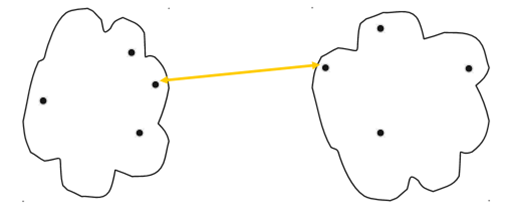
    - "complete" (Complete Link/Max): use longest distance between any 2 examples in two clusters
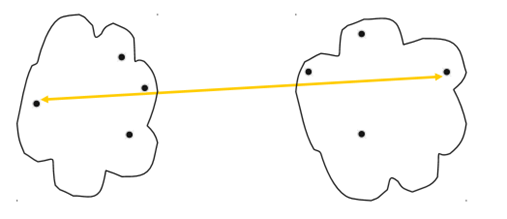
    - "average" (Group Average): use the average of all pair-wise distances
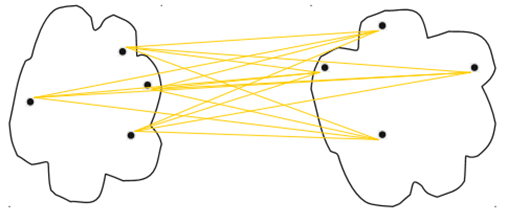

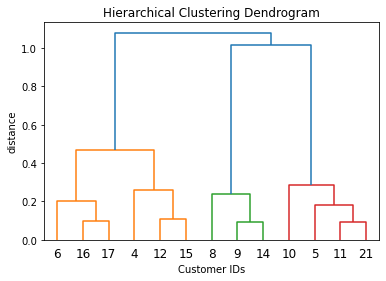

In [9]:
# import dendrogram and linkage from scipy
from scipy.cluster.hierarchy import dendrogram, linkage

# create the hierarchical clustering
Z = linkage(customer_data[['ItemsBought', 'ItemsReturned']], 'complete')

# set the plot title
plt.title('Hierarchical Clustering Dendrogram')

# set the axis labels
plt.xlabel('Customer IDs')
plt.ylabel('distance')

# plot the dendrogram
dendrogram(Z, labels=list(customer_data['Customer ID']))

# show the plot
plt.show()

##### Truncate the dendrogram
- The dendrogram can be hard to read when the dataset is large. Truncation is used to condense it. 
- setting ```truncate_mode``` to ```lastp```
- set the ```p``` attribute to the number of clusters (leaf nodes in the hierarchy) that you want to show

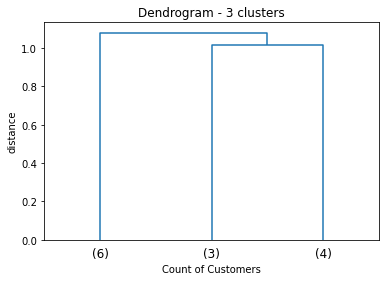

In [10]:
# set the plot title
plt.title('Dendrogram - 3 clusters')

# set the axis labels
plt.xlabel('Count of Customers')
plt.ylabel('distance')

# plot the dendrogram
dendrogram(Z, truncate_mode='lastp', p=3) # no labels possible

# show the plot
plt.show()

 You can change the orientation of the dendrogram with the ```orientation``` parameter:

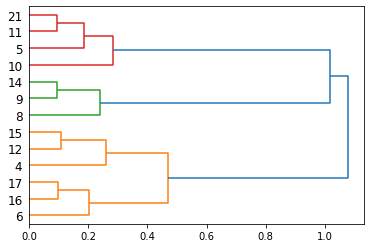

In [11]:
dendrogram(Z, orientation='right', labels=list(customer_data['Customer ID']))
plt.show()

### Agglomerative Hierarchical Clustering in scikit-learn
- like KMeans
- see Scikit Learn's documentation for [```AgglomerativeClustering```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
    - ```n_clusters``` specifies the number of clusters (i.e., where to cut the hierarchy)
    - ```linkage``` specifies the linkage mode (single, complete, average)
    - ```affinity``` specifies the similarity/distance measure
- function [```fit_predict```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering.fit_predict): Performs clustering on X and returns cluster labels.

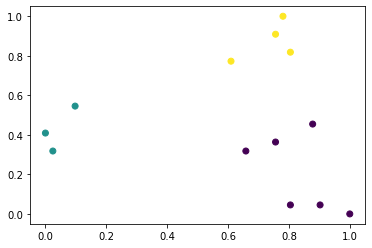

In [12]:
# import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# create the clusterer
agg = AgglomerativeClustering(n_clusters = 3, linkage='single', affinity='euclidean')

# create the clusters
clusters = agg.fit_predict(customer_data[['ItemsBought', 'ItemsReturned']])

# create a scatter plot
plt.scatter(customer_data['ItemsBought'], customer_data['ItemsReturned'], c=clusters)

# show the plot
plt.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
- Examples separated into Core, Border and Noise Points
- Can handle clusters of different shapes and sizes
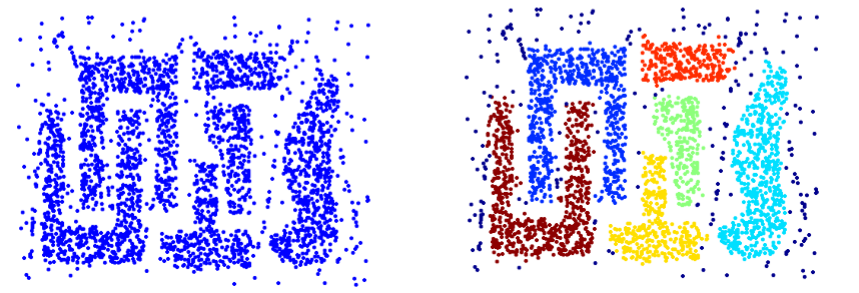
- works in the same way as KMeans
- See documentation for [```DBSCAN```](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- important parameters are:
    - ```min_samples```: The minimum number of points in the neighbourhood for a point to be considered a core point
    - ```eps```: The maximum distance between two points to be considered neighbours
    - ```metric```: The distance function, for example ```'euclidean'```, ```'cosine'```, or ```'manhattan'```

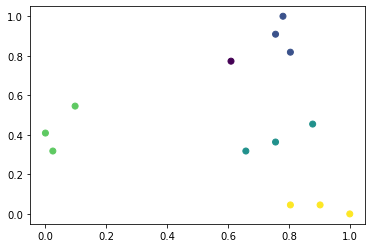

In [13]:
# import DBSCAN
from sklearn.cluster import DBSCAN

# create the clusterer
clusterer = DBSCAN(min_samples=3, eps=0.2, metric='euclidean')

# create the clusters
clusters = clusterer.fit(customer_data[['ItemsBought', 'ItemsReturned']])

# create a scatter plot
plt.scatter(customer_data['ItemsBought'], customer_data['ItemsReturned'], c=clusters.labels_)

# show the plot
plt.show()

## Try it yourself

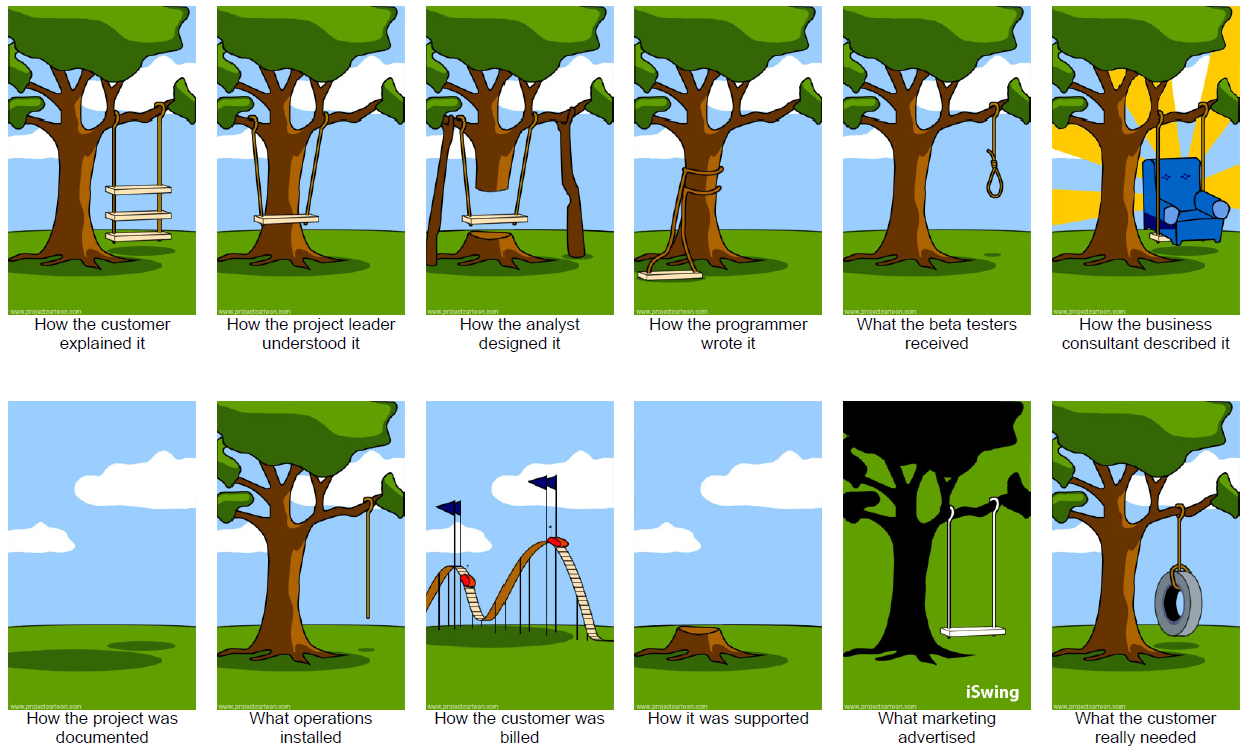
http://www.projectcartoon.com